In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [2]:
df = pd.read_csv('data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


<AxesSubplot:>

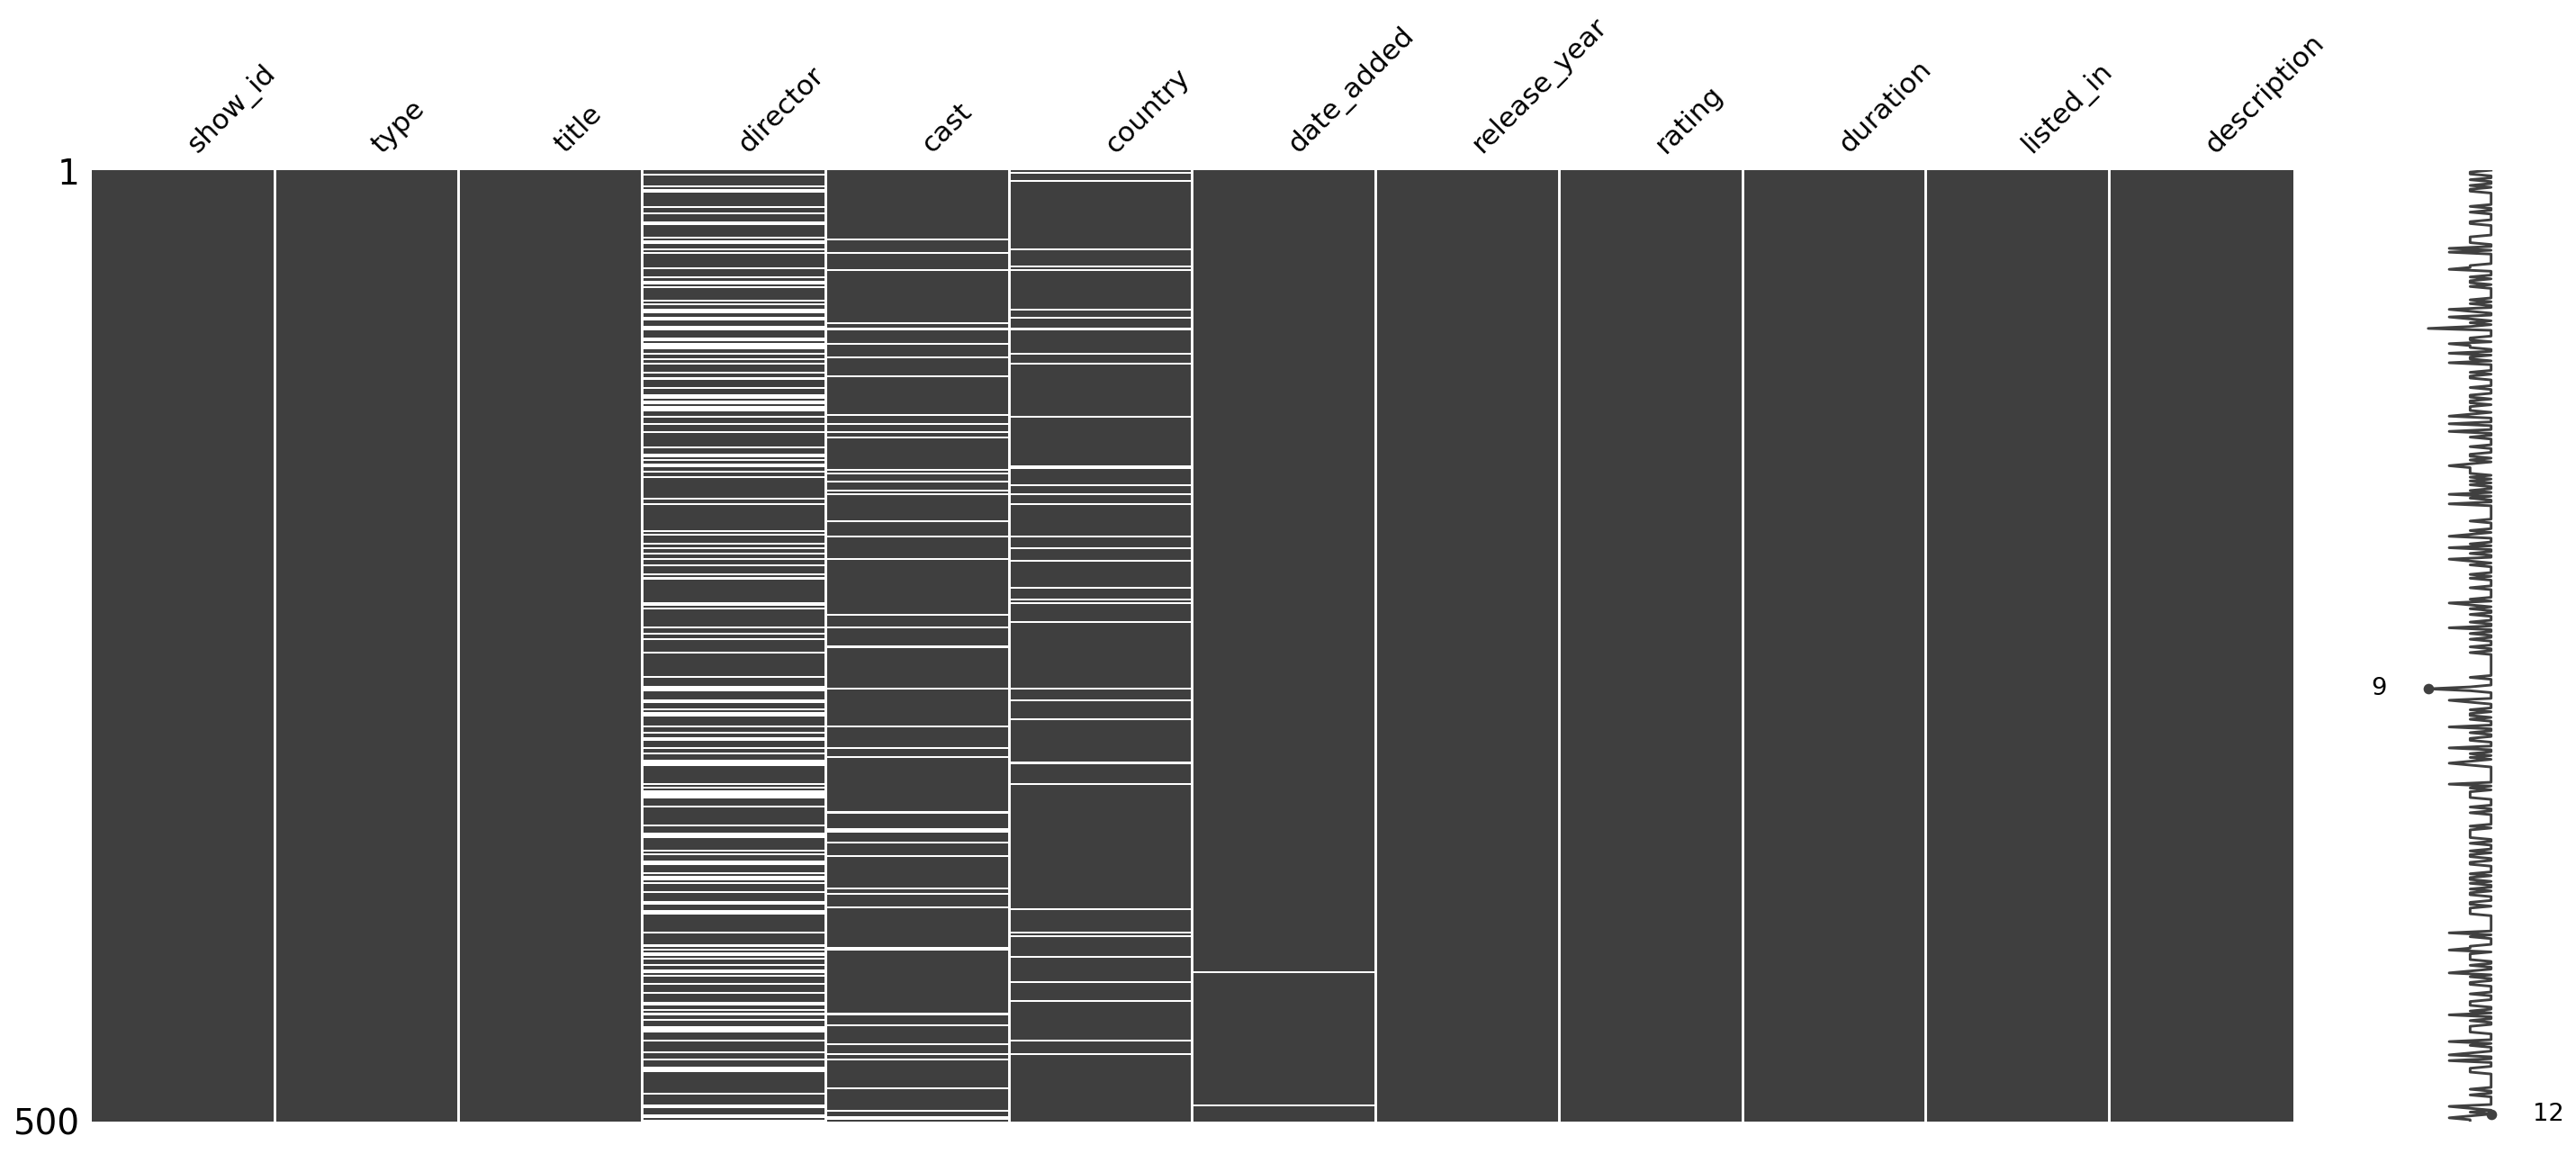

In [6]:
msno.matrix(df.sample(500))

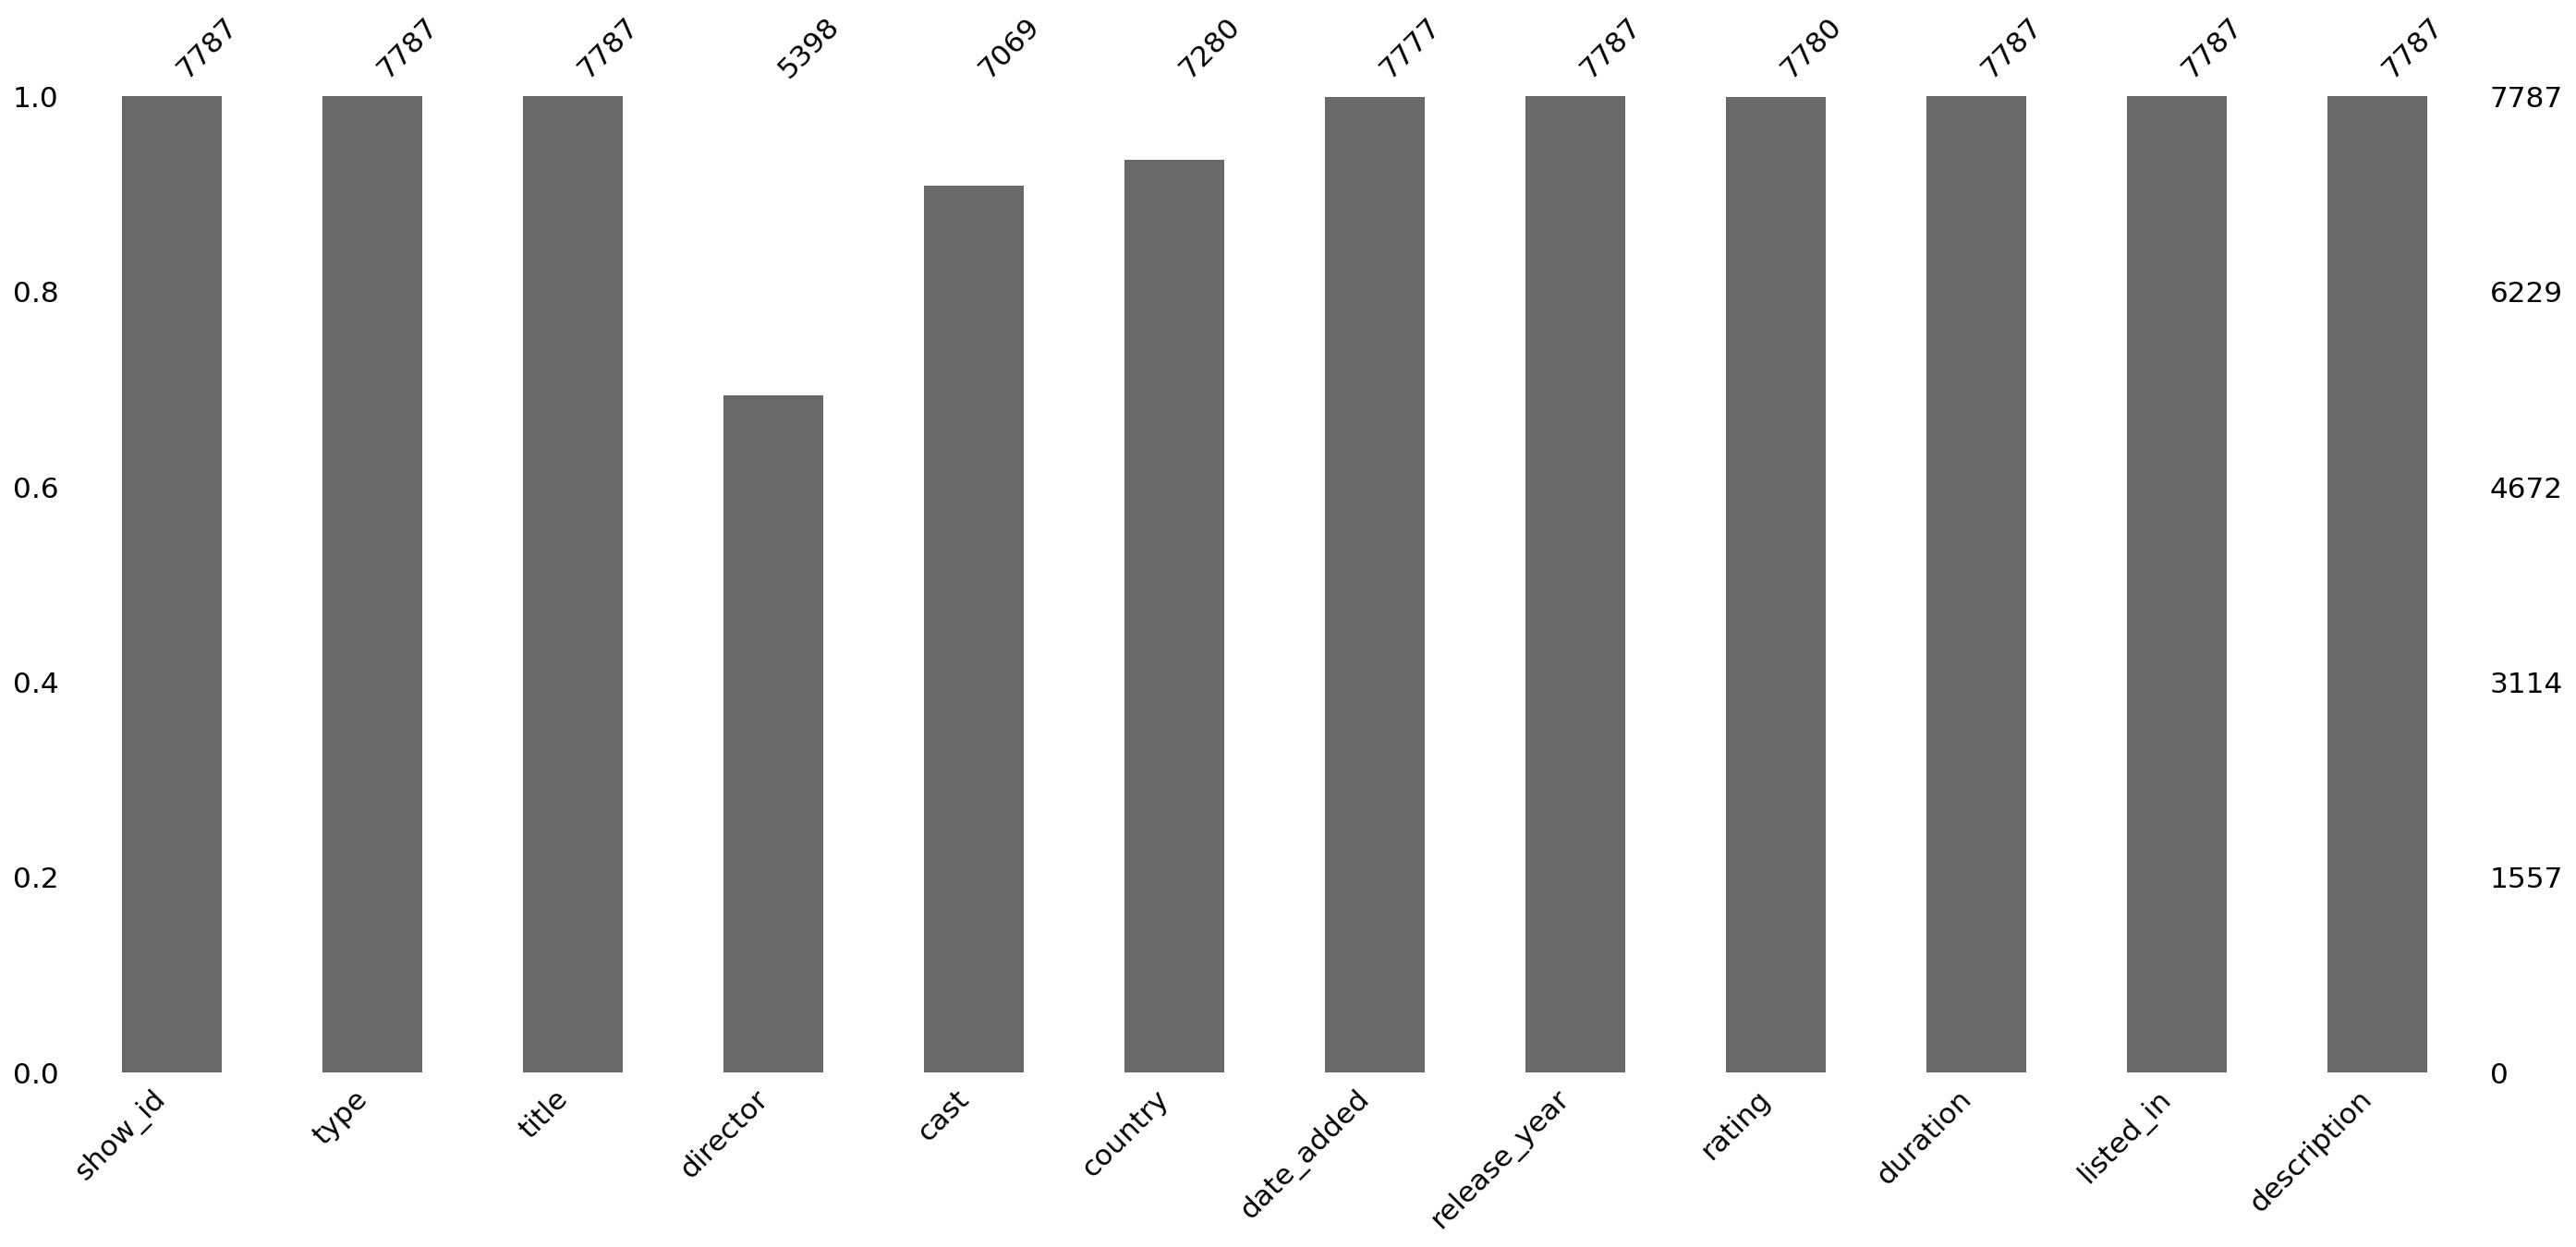

In [7]:
msno.bar(df);

In [8]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [3]:
df['country'] = df['country'].fillna(df['country'].mode())

In [4]:
df['cast'].replace(np.nan, 'Missing', inplace  = True)
df['director'].replace(np.nan, 'Missing', inplace  = True)

In [5]:
df.dropna(inplace=True)
df.drop_duplicates(inplace= True)

In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [7]:
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)   # 데이터의 첫 3행만 출력

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018


In [8]:
df.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019
7785,s7786,TV Show,Zumbo's Just Desserts,Missing,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,October,2020
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Missing,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,3,March,2020


In [8]:
df['country_1st'] = df['country'].apply(lambda x: x.split(',')[0])
df['country_1st'].tail()

7781     United States
7782            Sweden
7783             India
7785         Australia
7786    United Kingdom
Name: country_1st, dtype: object

In [9]:
df['country_1st'].replace('United States', 'USA', inplace=True)
df['country_1st'].replace('United Kingdom', 'UK', inplace=True)
df['country_1st'].replace('South Korea', 'S. Korea', inplace=True)
df['country_1st'].tail()

7781          USA
7782       Sweden
7783        India
7785    Australia
7786           UK
Name: country_1st, dtype: object

In [10]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
ratings_ages = {
    'TV-MA': 'Adults',
    'R': 'Adults',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'TV-PG': 'Older Kids',
    'NR': 'Adults',
    'TV-G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'NC-17': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Adults'
}

# https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly 참고

In [11]:
df['target_user'] = df['rating'].replace(ratings_ages)
df['target_user'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [12]:
df.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1st,target_user
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019,India,Teens
7785,s7786,TV Show,Zumbo's Just Desserts,Missing,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,October,2020,Australia,Older Kids
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Missing,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,3,March,2020,UK,Adults


In [13]:
df['duration'].unique()[:10]

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min'], dtype=object)

In [14]:
df['season_count'] = df.apply(lambda x : x['duration'].split(' ')[0] if 'Season' in x['duration'] else "", axis = 1)
df['season_count'].unique()

array(['4', '', '1', '2', '3', '5', '9', '8', '6', '11', '13', '12', '10',
       '7', '16', '15'], dtype=object)

In [15]:
df['season_count'].replace('', np.nan, inplace=True)

In [16]:
df['duration'] = df.apply(lambda x : x['duration'].split(' ')[0] if 'Season' not in x['duration'] else "", axis = 1)
df['duration'].unique()[:10]

array(['', '93', '78', '80', '123', '95', '119', '118', '143', '103'],
      dtype=object)

In [17]:
df['duration'].replace('', np.nan, inplace=True)

In [18]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

In [19]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020,Brazil,Adults,4,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016,Mexico,Adults,NaN,"[Dramas, International Movies]"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018,Singapore,Adults,NaN,"[Horror Movies, International Movies]"


In [20]:
df = df.drop(columns=['show_id', 'description'])

In [21]:
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
0,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",8,August,2020,Brazil,Adults,4,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",12,December,2016,Mexico,Adults,NaN,"[Dramas, International Movies]"
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",12,December,2018,Singapore,Adults,NaN,"[Horror Movies, International Movies]"


# Change Dtype

In [23]:
df.dtypes

type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
month_added                  int64
month_name_added            object
year_added                   int64
country_1st                 object
target_user                 object
season_count                object
genre                       object
dtype: object

In [22]:
df['type'] = pd.Categorical(df['type'])
df['target_user'] = pd.Categorical(df['target_user'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
df['year_added'] = pd.to_numeric(df['year_added'])
df['duration'] = pd.to_numeric(df['duration'])
df['season_count'] = pd.to_numeric(df['season_count'])

In [23]:
df.dtypes

type                      category
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                   float64
listed_in                   object
month_added                  int64
month_name_added            object
year_added                   int64
country_1st                 object
target_user               category
season_count               float64
genre                       object
dtype: object

In [24]:
df_tv = df[df['type'] == 'TV Show']

In [25]:
df_tv.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
0,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",8,August,2020,Brazil,Adults,4.0,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries",7,July,2017,Turkey,Adults,1.0,"[International TV Shows, TV Dramas, TV Mysteries]"
11,TV Show,1983,Missing,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Dramas",11,November,2018,Poland,Adults,1.0,"[Crime TV Shows, International TV Shows, TV Dr..."


In [26]:
df_movie = df[df['type'] == 'Movie']

In [27]:
df_movie.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93.0,"Dramas, International Movies",12,December,2016,Mexico,Adults,NaN,"[Dramas, International Movies]"
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78.0,"Horror Movies, International Movies",12,December,2018,Singapore,Adults,NaN,"[Horror Movies, International Movies]"
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80.0,"Action & Adventure, Independent Movies, Sci-Fi...",11,November,2017,USA,Teens,NaN,"[Action & Adventure, Independent Movies, Sci-F..."


In [28]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'STIXGeneral',
 'cmr10',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'cmss10',
 'DejaVu Serif',
 'cmb10',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'STIXSizeFourSym',
 'cmsy10',
 'cmtt10',
 'DejaVu Sans',
 'cmex10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'cmmi10',
 'STIXSizeTwoSym',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'Bookman Old Style',
 'Corbel',
 'Parchment',
 'godoRounded L',
 'HCR Batang',
 'Courier New',
 'Bodoni MT',
 'Segoe UI',
 'Yj BONMOKGAK Medium ',
 'HYtbrB',
 'Franklin Gothic Book',
 'Wingdings 2',
 'Blippo Blk BT',
 'MDAlong',
 'Orator10 BT',
 'Kozuka Mincho Pr6N',
 'Adobe Caslon Pro',
 'Noto Sans CJK KR',
 'Trajan Pro',
 'Noto Serif KR'

In [29]:
# unicode minus 깨짐현상 방지
plt.rcParams['axes.unicode_minus'] = False

In [30]:
# seaborn 그래프 스타일 지정 : 한 번만 실행
sns.set(style='white')

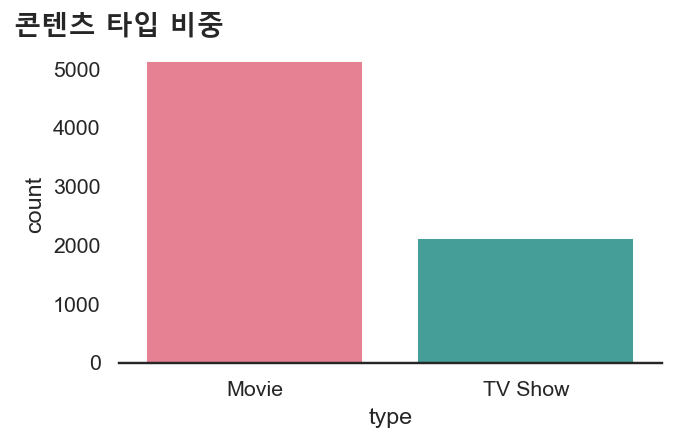

In [31]:
plt.figure(figsize=(5,3))
sns.countplot(x='type', data=df, palette='husl')
sns.despine(left=True)
plt.title('콘텐츠 타입 비중', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()

Seaborn 컬러 팔레트 선택 :
https://seaborn.pydata.org/tutorial/color_palettes.html

In [29]:
type_count = df.groupby(['type'])['type'].count()
length = len(df)
result = (type_count/length).round(2)

In [30]:
(df.groupby(['type'])['type'].count()/length).round(2)

type
Movie      0.71
TV Show    0.29
Name: type, dtype: float64

In [31]:
type_ratio = pd.DataFrame(result).T

In [32]:
type_ratio

type,Movie,TV Show
type,0.71,0.29


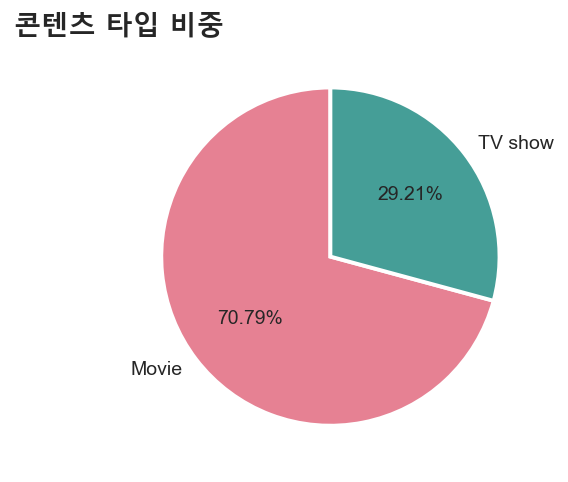

In [77]:
labels = ['Movie', 'TV show']
wedgeprops = {"linewidth": 2, 'width':1, "edgecolor":'w'}

plt.figure(figsize=(6,4))
plt.pie(type_count/length, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#E68193', '#459E97'], 
        textprops={'fontsize': 10}, wedgeprops = wedgeprops)
plt.title('콘텐츠 타입 비중', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()

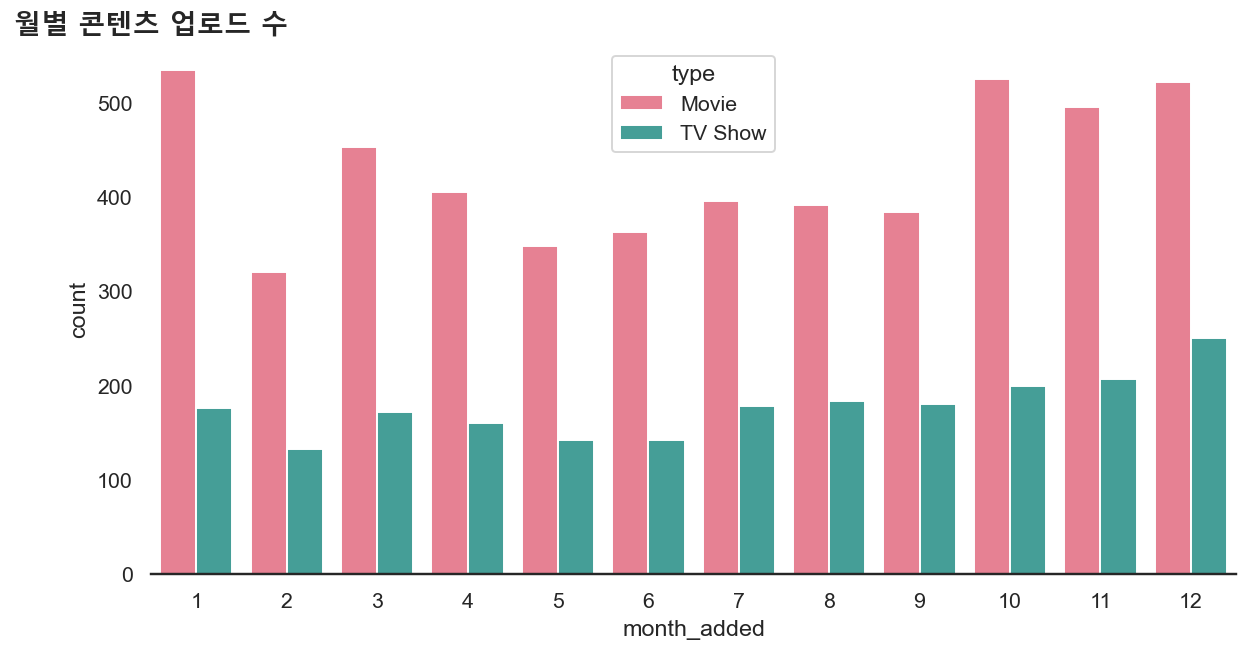

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='month_added', hue='type', data=df, palette='husl')
sns.despine(left=True)
plt.title('월별 콘텐츠 업로드 수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()

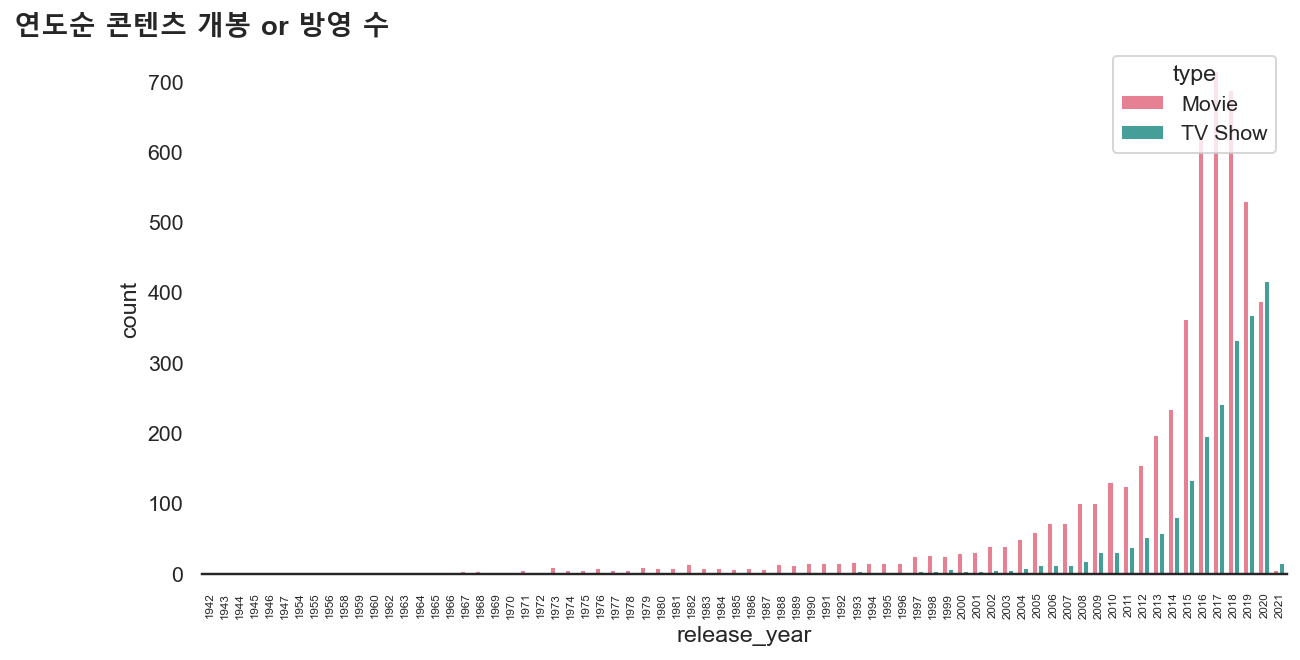

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(x='release_year', hue='type', data=df, palette='husl')
sns.despine(left=True)
plt.title('연도순 콘텐츠 개봉 or 방영 수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=90, fontsize=6)
plt.show()

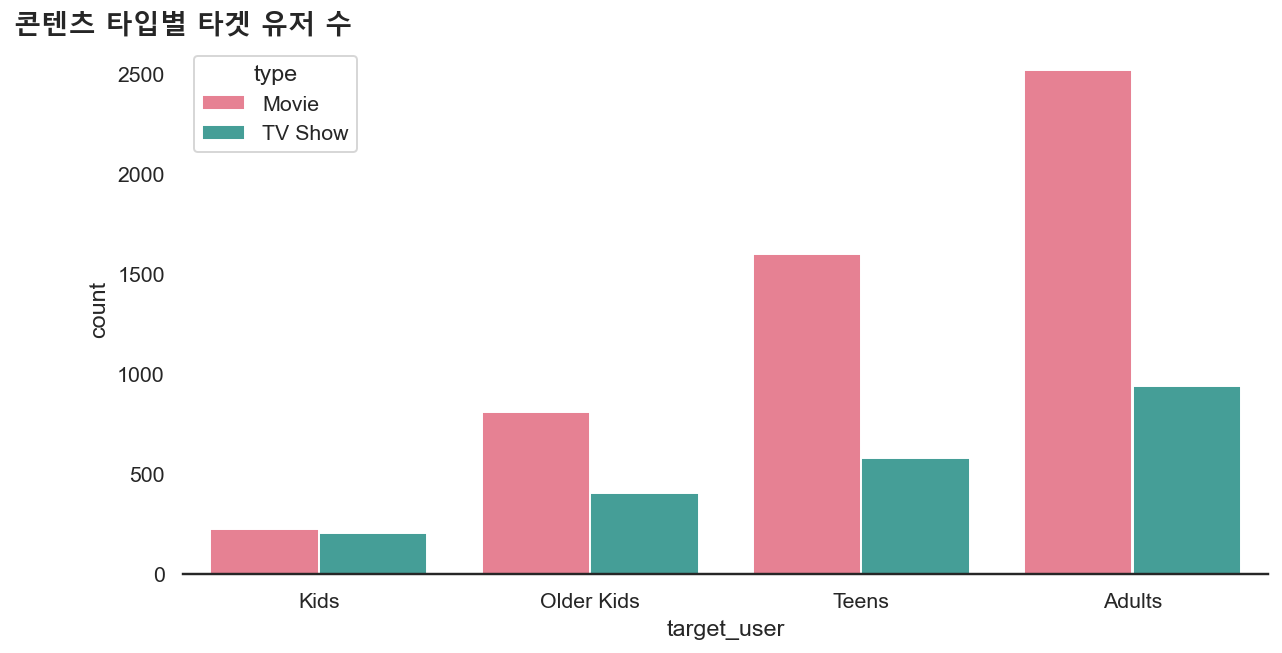

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x='target_user', hue='type', data=df, palette='husl')
sns.despine(left=True)
plt.title('콘텐츠 타입별 타겟 유저 수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks()
plt.show()

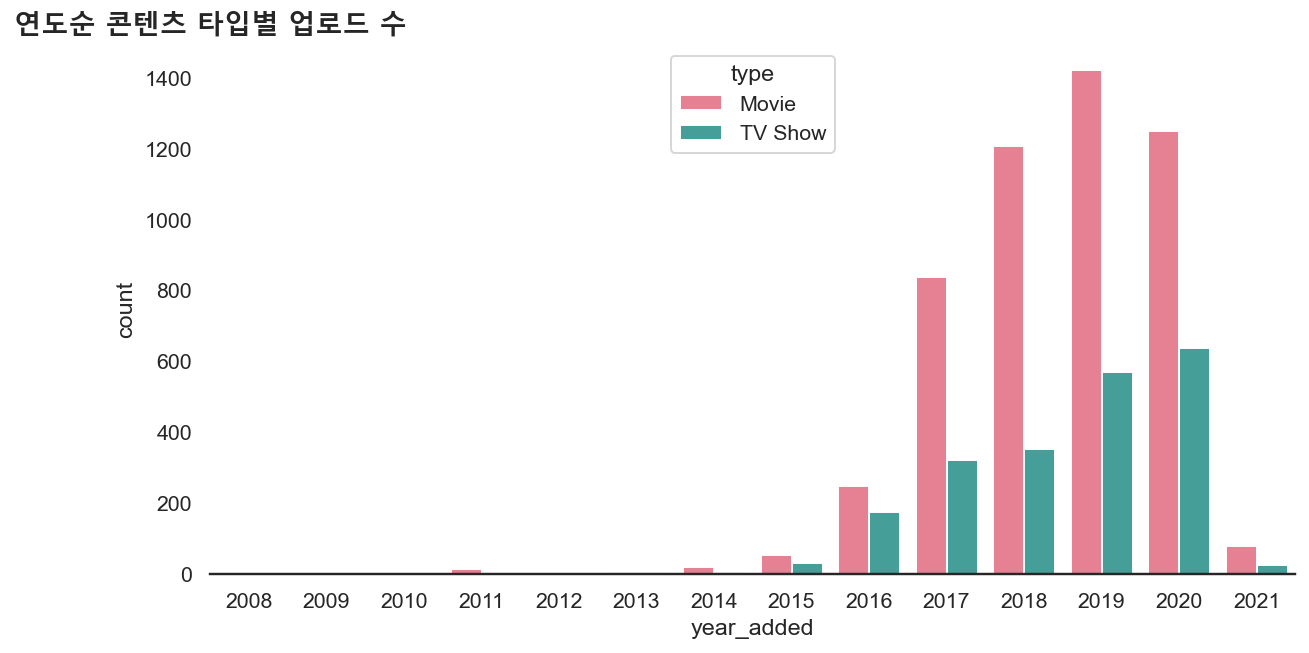

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='year_added', hue='type', data=df, palette='husl')
sns.despine(left=True)
plt.title('연도순 콘텐츠 타입별 업로드 수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks()
plt.show()

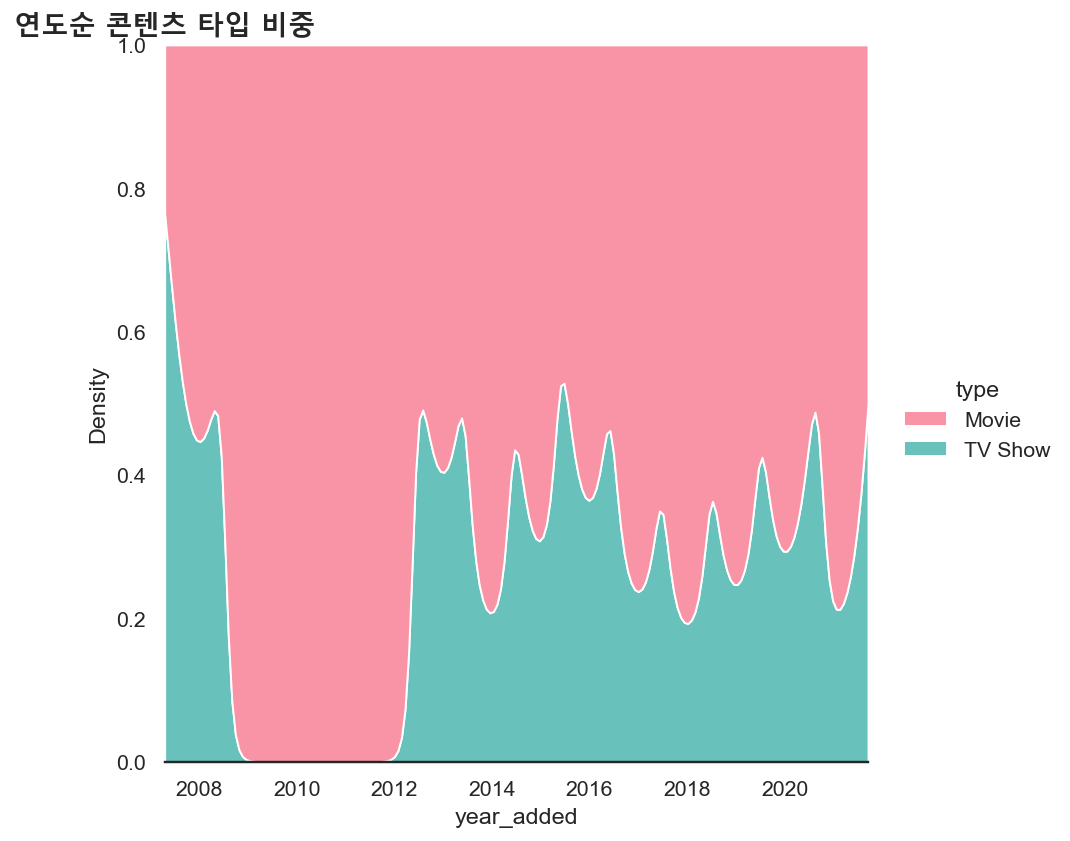

In [39]:
sns.displot(x='year_added', hue='type', data=df, kind='kde', height=6,
    multiple='fill', clip=(0, None), palette='husl')
sns.despine(left=True)
plt.title('연도순 콘텐츠 타입 비중', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks()
plt.show()

<Figure size 1400x700 with 0 Axes>

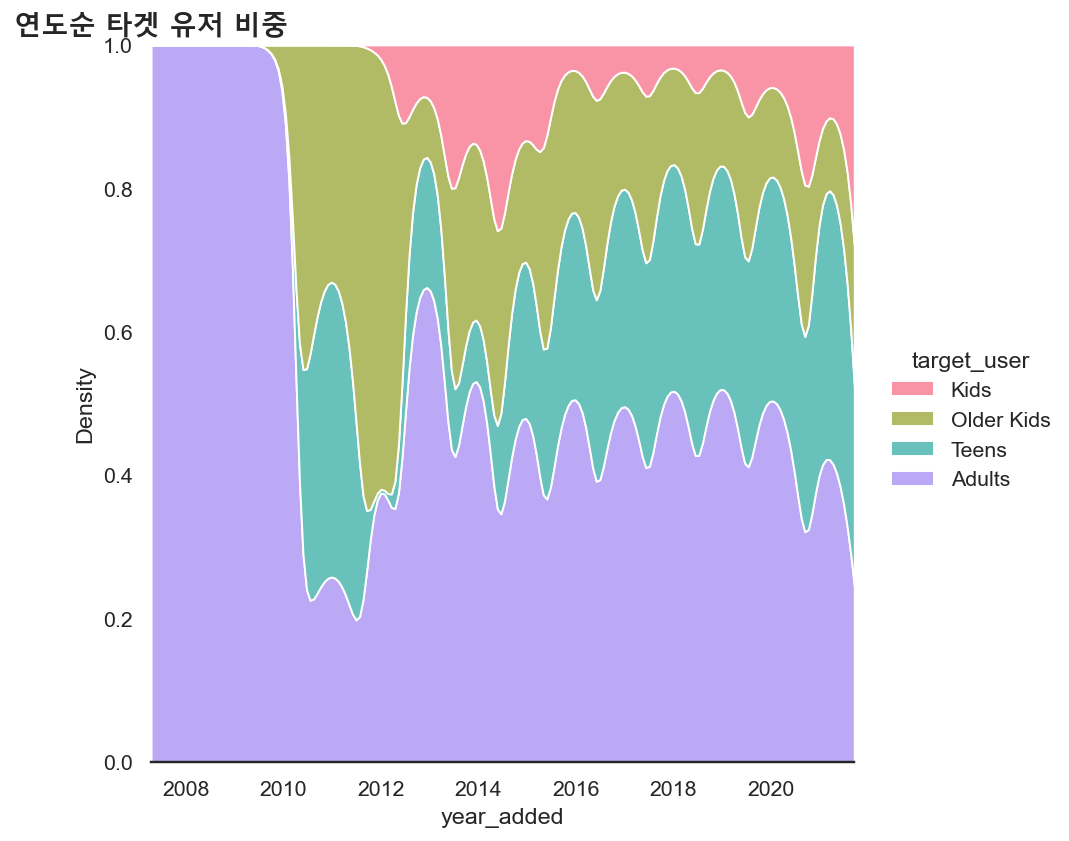

In [69]:
sns.displot(x='year_added', hue='target_user', data=df, kind='kde', height=6,
    multiple='fill', clip=(0, None), palette='husl')
sns.despine(left=True)
plt.title('연도순 타겟 유저 비중', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks()
plt.show()

In [60]:
df_movie['listed_in'].value_counts().head(10)

Documentaries                                       322
Dramas, International Movies                        307
Stand-Up Comedy                                     293
Comedies, Dramas, International Movies              240
Dramas, Independent Movies, International Movies    213
Children & Family Movies, Comedies                  160
Documentaries, International Movies                 159
Comedies, International Movies                      149
Dramas, International Movies, Romantic Movies       147
Children & Family Movies                            138
Name: listed_in, dtype: int64

In [45]:
movie_top10 = df_movie['listed_in'].value_counts().head(10)

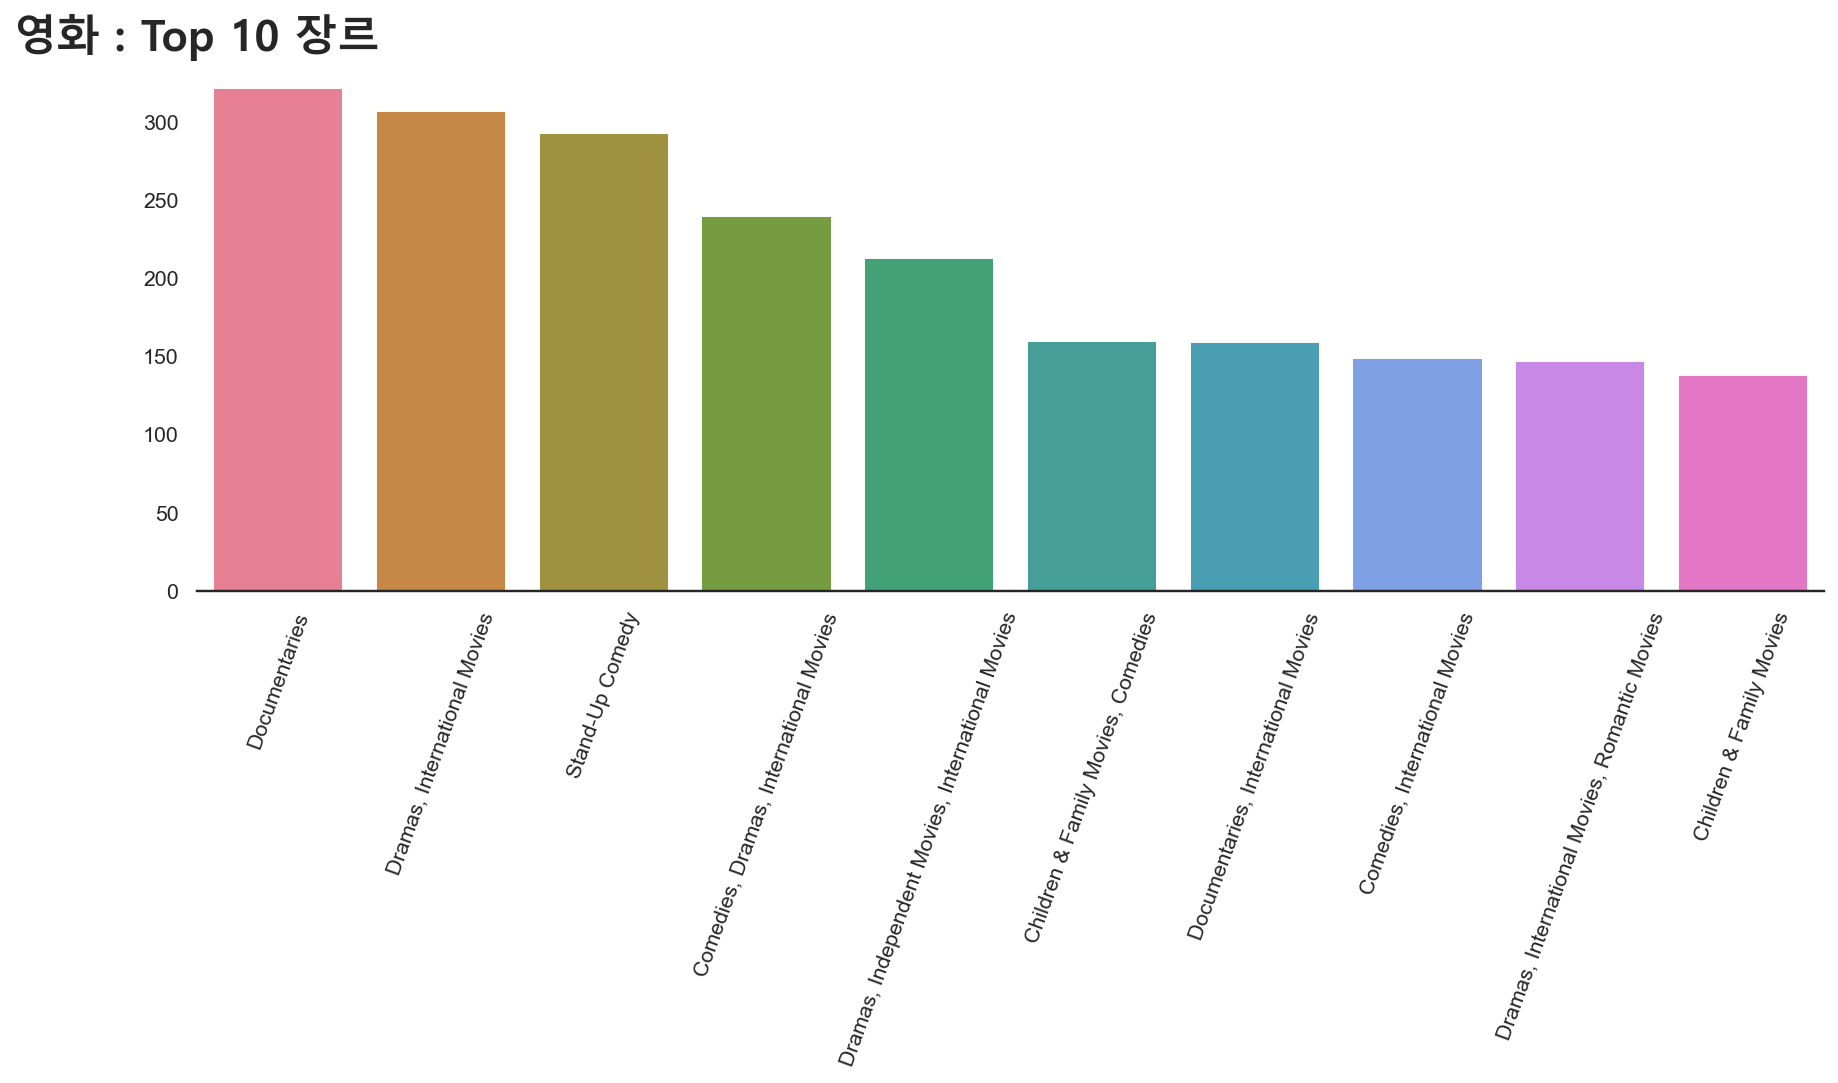

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(x = movie_top10.index,
            y = movie_top10.values, palette='husl')
sns.despine(left=True)
plt.xticks(rotation=70)
plt.title('영화 : Top 10 장르', fontsize=22, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()

In [64]:
df_tv['listed_in'].value_counts().head(10)

Kids' TV                                                      166
Crime TV Shows, International TV Shows, TV Dramas              96
Kids' TV, TV Comedies                                          77
International TV Shows, TV Dramas                              77
Reality TV                                                     73
Anime Series, International TV Shows                           72
Docuseries                                                     65
International TV Shows, Korean TV Shows, Romantic TV Shows     64
TV Comedies                                                    61
International TV Shows, Romantic TV Shows, TV Dramas           61
Name: listed_in, dtype: int64

In [65]:
tv_top10 = df_tv['listed_in'].value_counts().head(10)

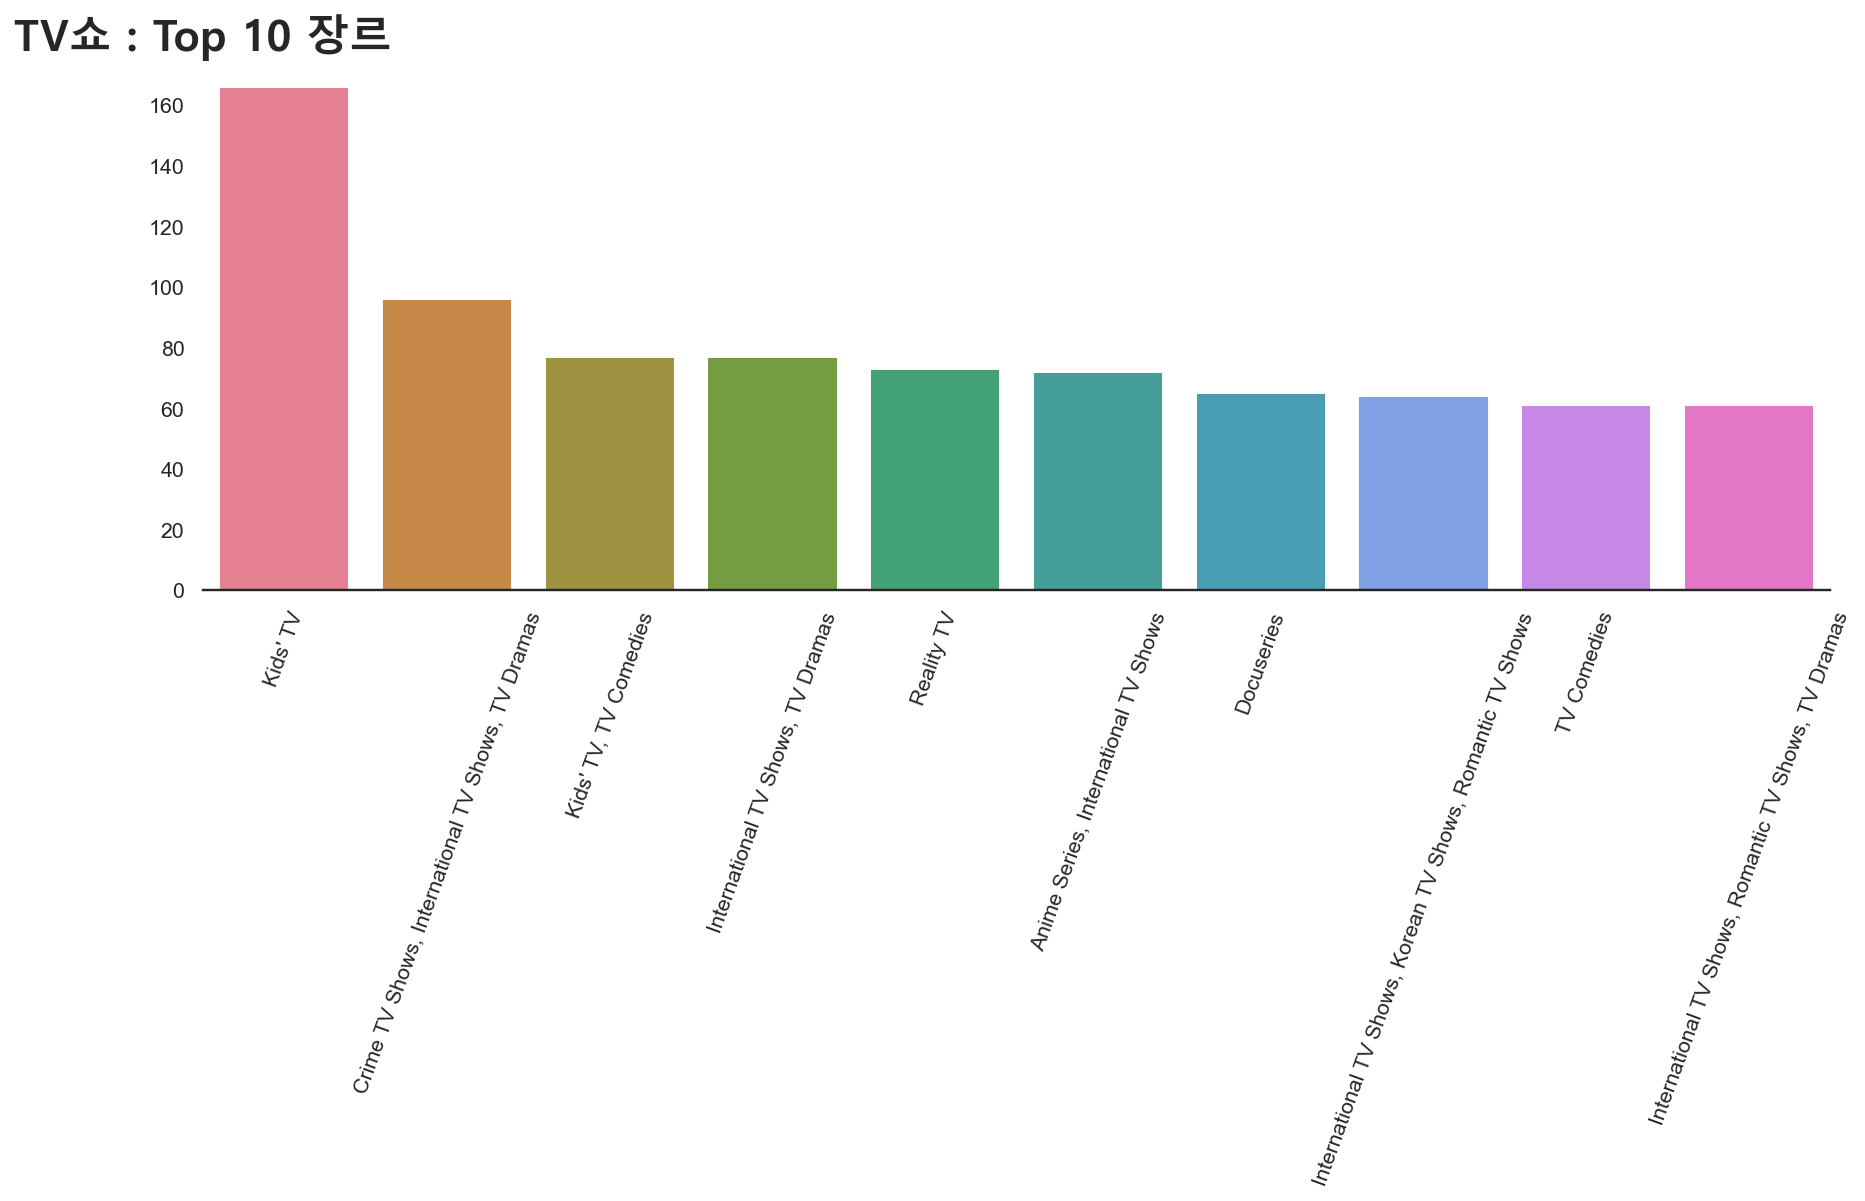

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x = tv_top10.index,
            y = tv_top10.values, palette='husl')
sns.despine(left=True)
plt.xticks(rotation=70)
plt.title('TV쇼 : Top 10 장르', fontsize=22, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()

In [55]:
df_duration_over0 = df[df['duration'] > 0]

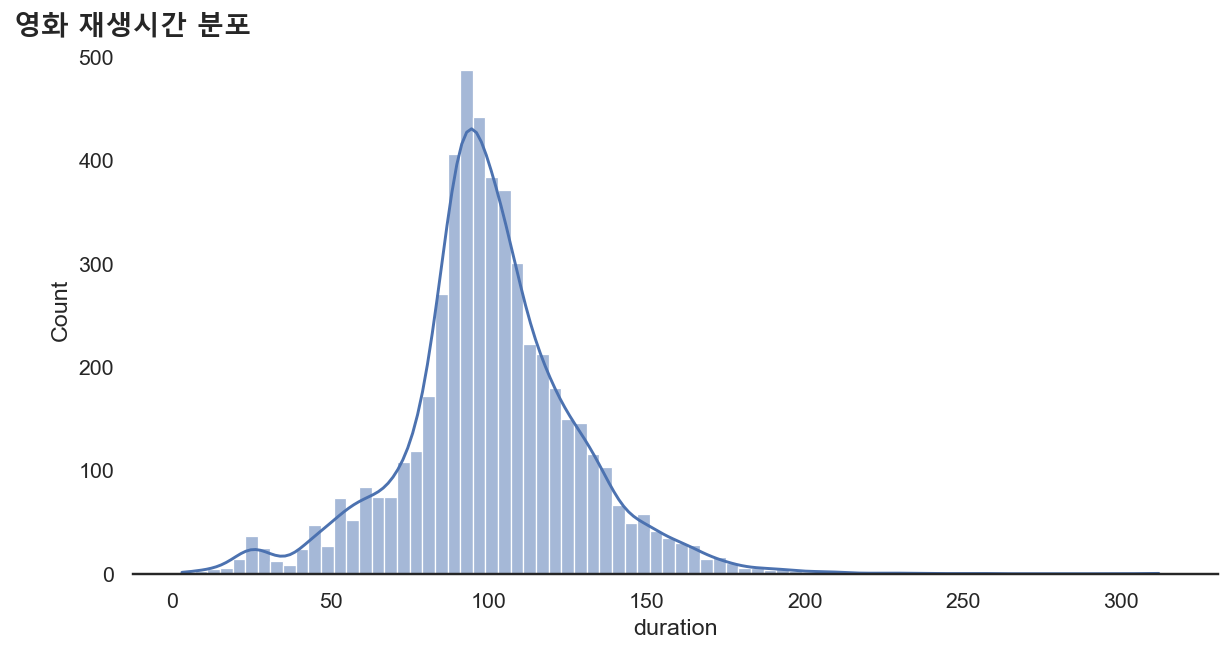

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(x='duration', bins=30, binwidth=4, kde=True, discrete=False, data=df_duration_over0)
sns.despine(left=True)
plt.title('영화 재생시간 분포', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()

In [59]:
df_season_count = df['season_count'].value_counts().reset_index().sort_values('season_count', ascending=False)

In [60]:
df_season_count

,index,season_count
0,1.0,1371
1,2.0,350
2,3.0,173
3,4.0,86
4,5.0,57
5,6.0,30
6,7.0,18
7,8.0,17
8,9.0,7
9,10.0,5


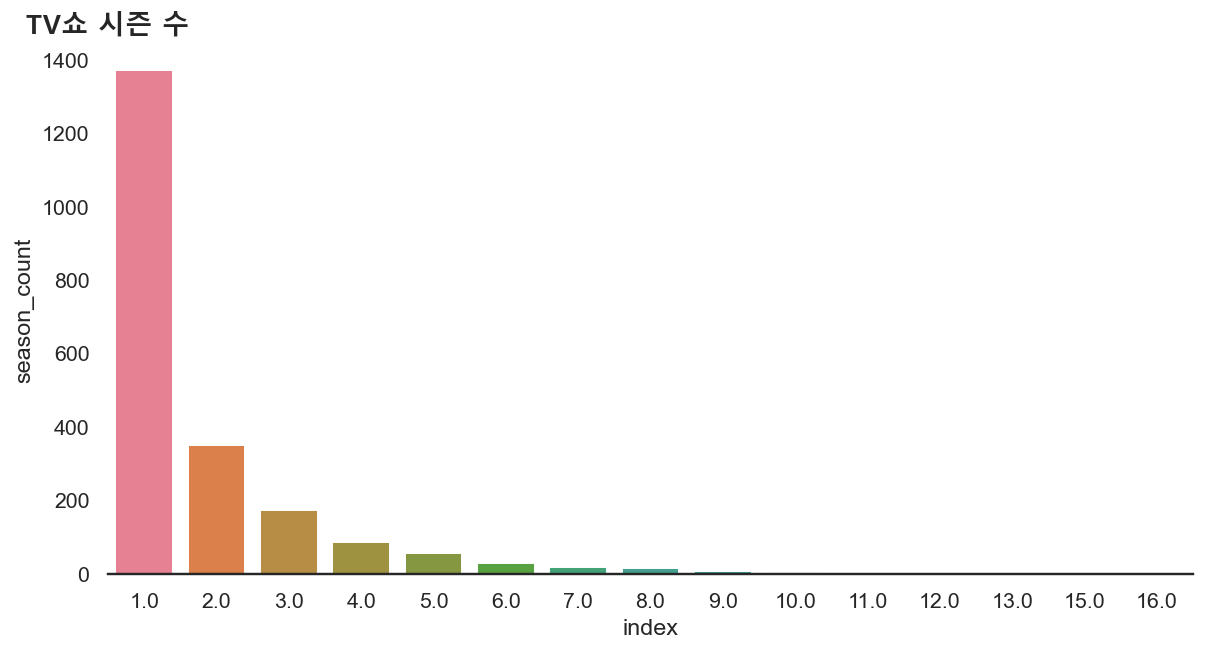

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x='index', y='season_count', data=df_season_count, palette='husl')
sns.despine(left=True)
plt.title('TV쇼 시즌 수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks()
plt.show()

In [40]:
contents_added_movie = df_movie['year_added'].value_counts().reset_index()
contents_added_movie = contents_added_movie.rename(columns = {'index' : 'year_added', 'year_added' : 'count'})
contents_added_movie = contents_added_movie.sort_values('year_added')
contents_added_movie['type'] = 'Movie'

In [41]:
contents_added_movie

,year_added,count,type
13,2008,1,Movie
11,2009,2,Movie
12,2010,1,Movie
8,2011,13,Movie
10,2012,3,Movie
9,2013,6,Movie
7,2014,19,Movie
6,2015,54,Movie
4,2016,247,Movie
3,2017,837,Movie


In [42]:
contents_added_tv = df_tv['year_added'].value_counts().reset_index()
contents_added_tv = contents_added_tv.rename(columns = {'index' : 'year_added', 'year_added' : 'count'})
contents_added_tv = contents_added_tv.sort_values('year_added')
contents_added_tv['type'] = 'TV show'

In [43]:
contents_added_tv

,year_added,count,type
9,2008,1,TV show
8,2013,5,TV show
7,2014,6,TV show
5,2015,29,TV show
4,2016,174,TV show
3,2017,320,TV show
2,2018,353,TV show
1,2019,571,TV show
0,2020,639,TV show
6,2021,24,TV show


In [50]:
df_contents_added = pd.concat([contents_added_tv, contents_added_movie])
df_contents_added = df_contents_added.reset_index()
df_contents_added

,index,year_added,count,type
0,9,2008,1,TV show
1,8,2013,5,TV show
2,7,2014,6,TV show
3,5,2015,29,TV show
4,4,2016,174,TV show
5,3,2017,320,TV show
6,2,2018,353,TV show
7,1,2019,571,TV show
8,0,2020,639,TV show
9,6,2021,24,TV show


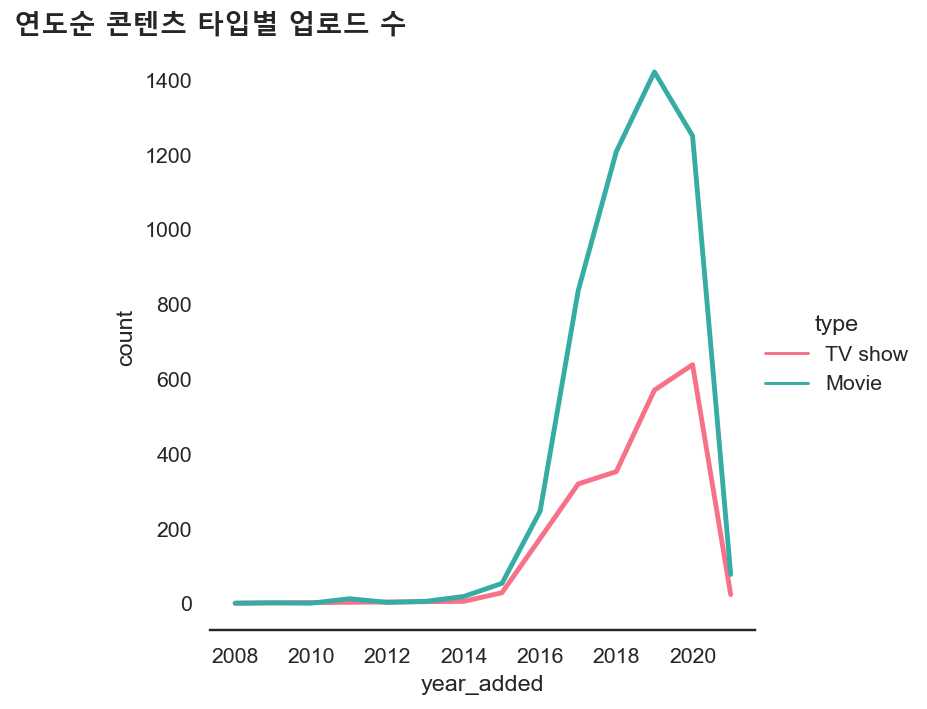

In [49]:
sns.relplot(x='year_added', y='count', hue='type', linewidth=2.5, palette='husl', kind='line', data=df_contents_added)
sns.despine(left=True)
plt.title('연도순 콘텐츠 타입별 업로드 수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()

In [51]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_bymonth = df.groupby('year_added')['month_name_added'].value_counts().unstack().fillna(0)[month_order].T

In [52]:
df_bymonth

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_name_added,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,6.0,21.0,93.0,110.0,173.0,206.0,161.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,5.0,4.0,45.0,79.0,151.0,262.0,152.0,0.0
October,0.0,0.0,0.0,11.0,0.0,3.0,4.0,14.0,50.0,123.0,171.0,185.0,164.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,40.0,104.0,113.0,130.0,166.0,0.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,40.0,102.0,161.0,136.0,132.0,0.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,29.0,77.0,152.0,157.0,150.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,17.0,90.0,67.0,164.0,159.0,0.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,12.0,86.0,91.0,133.0,159.0,0.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,93.0,106.0,157.0,181.0,0.0


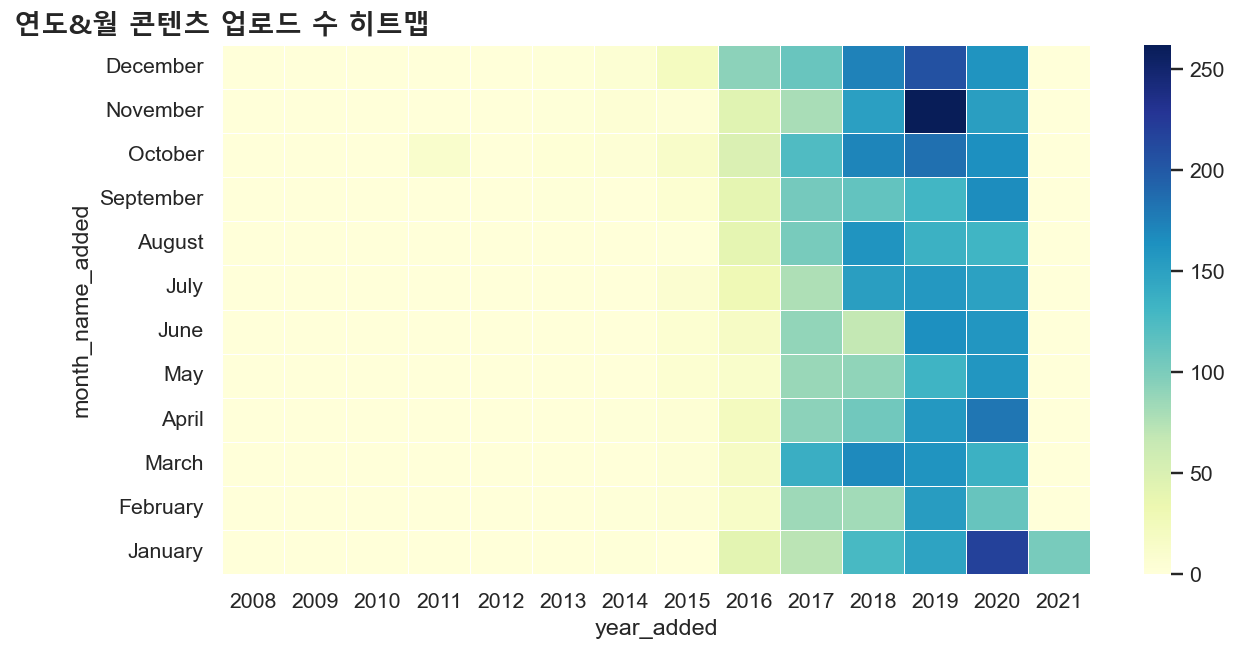

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(df_bymonth, linewidths=.5, cmap='YlGnBu')
plt.title('연도&월 콘텐츠 업로드 수 히트맵', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()

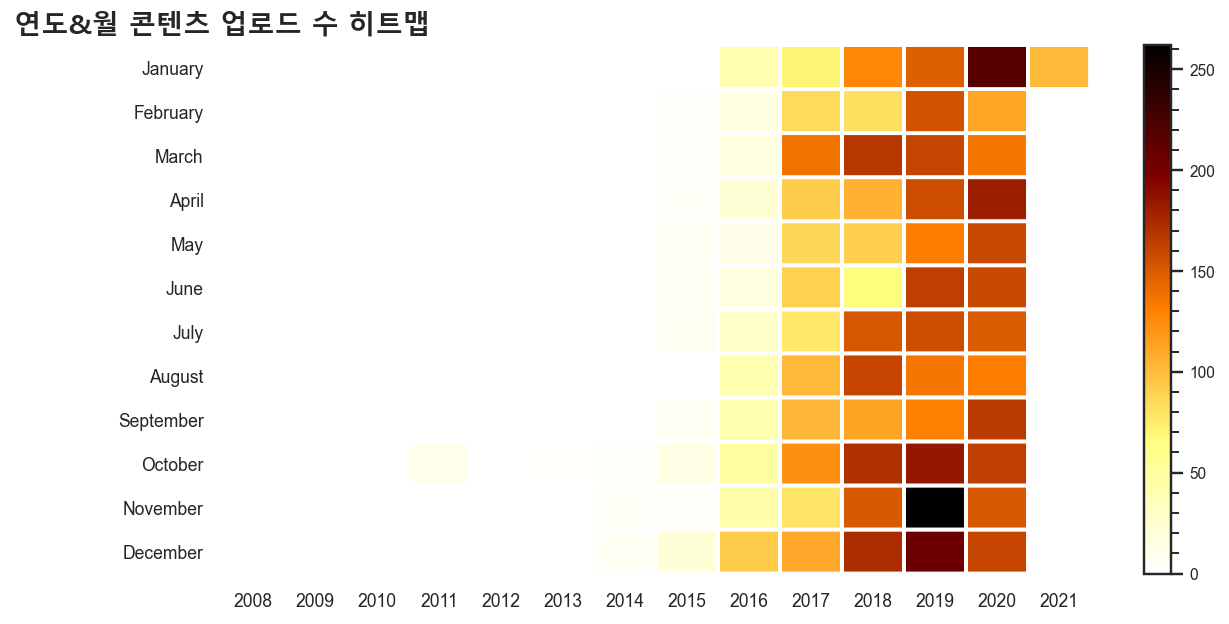

In [54]:
plt.figure(figsize=(10, 5))
plt.pcolor(df_bymonth, cmap='afmhot_r', edgecolors='white', linewidths=2) 

plt.title('연도&월 콘텐츠 업로드 수 히트맵', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()

plt.xticks(np.arange(0.5, len(df_bymonth.columns), 1), df_bymonth.columns, fontsize=9, fontfamily='arial')
plt.yticks(np.arange(0.5, len(df_bymonth.index), 1), df_bymonth.index, fontsize=9, fontfamily='arial')
plt.box(False)
plt.show()

In [33]:
top10_country = df.groupby('country_1st')['country'].agg('count').sort_values(ascending=False)[:10]
top10_country.head(10)

country_1st
USA         2874
India        956
UK           576
Canada       259
Japan        235
France       196
S. Korea     194
Spain        168
Mexico       123
Turkey       106
Name: country, dtype: int64

In [34]:
# Top1 컬러만 다르게하기 위한 컬러셋 변수 생성
colors = ['#f1f1f1' for _ in range(len(top10_country))]
colors[0] =  '#E50914'

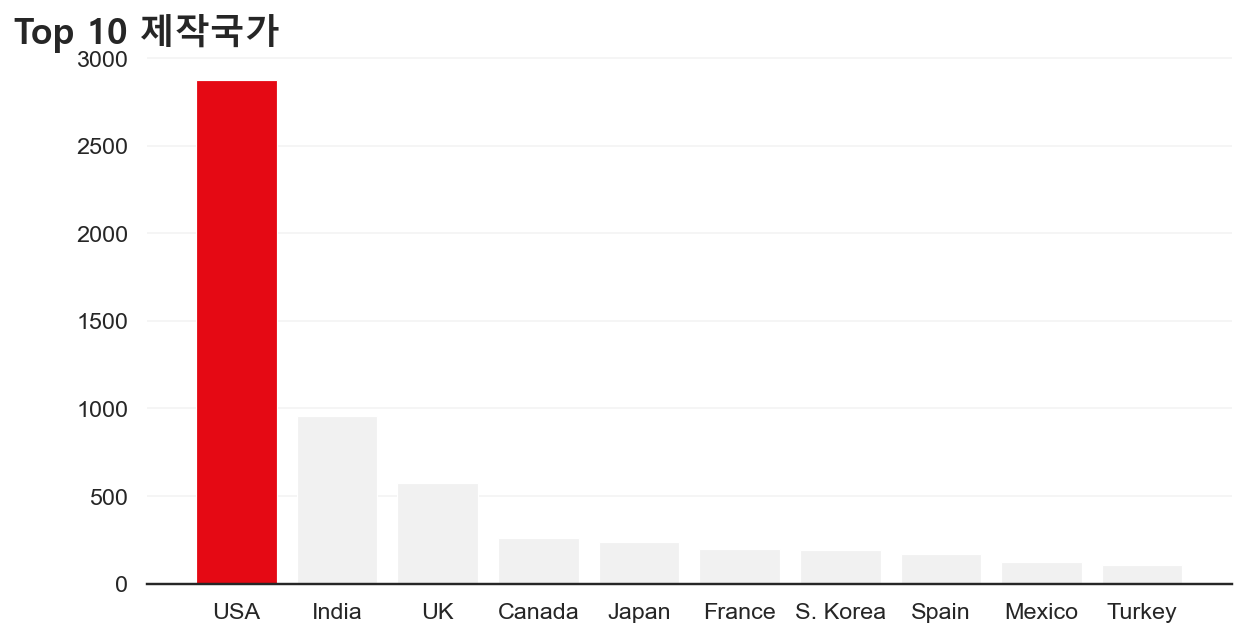

In [48]:
plt.figure(figsize=(10,5))
plt.bar(top10_country.index, top10_country, width=0.8, linewidth=0.6, color=colors)
plt.grid(axis='y', linestyle='-', alpha=0.2)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Top 10 제작국가', fontsize=18, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))

# 차트 외곽 라인 감춤 : seaborn의 despine 함수 활용
sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

In [36]:
top10_country_df = df.groupby('country_1st')['country'].agg('count').sort_values(ascending=False)[:10].reset_index()
top10_country_df.head(10)

,country_1st,country
0,USA,2874
1,India,956
2,UK,576
3,Canada,259
4,Japan,235
5,France,196
6,S. Korea,194
7,Spain,168
8,Mexico,123
9,Turkey,106


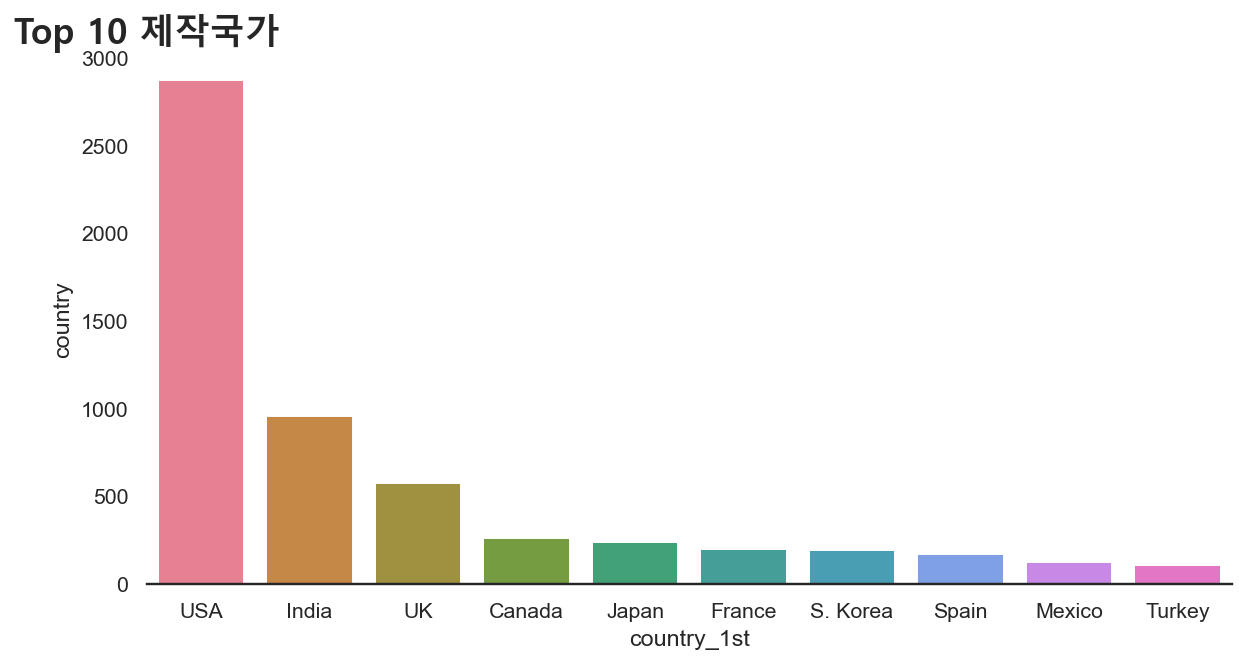

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x='country_1st', y='country', data=top10_country_df, palette='husl')
sns.despine(left=True)
plt.title('Top 10 제작국가', fontsize=18, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()

In [ ]:
!pip install wordcloud

In [40]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(df_movie['listed_in'])

In [45]:
text

'Dramas, International Movies Horror Movies, International Movies Action & Adventure, Independent Movies, Sci-Fi & Fantasy Dramas Horror Movies, International Movies Dramas Horror Movies, International Movies Horror Movies, International Movies, Thrillers Dramas, Thrillers Documentaries, International Movies, Sports Movies Independent Movies, Sci-Fi & Fantasy, Thrillers Dramas, International Movies, Thrillers Dramas, Thrillers Comedies, Dramas, Independent Movies Sports Movies Dramas, Independent Movies, International Movies Action & Adventure, Dramas, International Movies Dramas, International Movies Dramas, International Movies Documentaries Horror Movies, International Movies, Thrillers Documentaries, International Movies Documentaries, International Movies Dramas, International Movies, Romantic Movies Dramas, International Movies, Romantic Movies Comedies Comedies, Romantic Movies Documentaries, Sports Movies Comedies, Dramas, International Movies Comedies, Dramas, International Mo

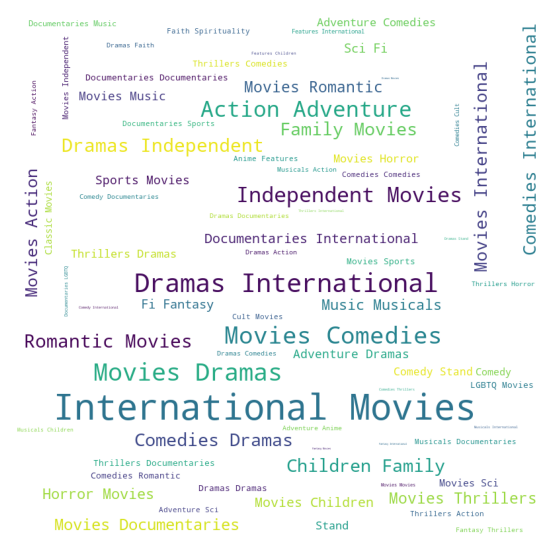

In [39]:
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color='white', width=800,  height=800, max_words=80, margin=10, random_state=1).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()